# Batting Average Analysis
## For the start(ish) of the 2017 season
### MSP 04.29.2017

This jupyter notebook lays out some for for investigating average projections in 2017.

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# now read in all the data: it's a lot, but is set up this way so that
#  we can slice across batting order.

#
# general fangraphs data for players
#
# all with > 100 PA at given lineup position

def read_team_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG"),\
                         'formats': ('S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4')},\
                 skip_header=1,delimiter=',')
    return BatData


Teams2016 = read_team_batting_data('2016Batting/Team2016Totals.csv')

def read_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skip_header=1,delimiter=',')
    return BatData



Total2016   = read_batting_data('2016Batting/TotalBatting.csv')

First2016   = read_batting_data('2016Batting/BattingFirst.csv')
Second2016  = read_batting_data('2016Batting/BattingSecond.csv')
Third2016   = read_batting_data('2016Batting/BattingThird.csv')
Fourth2016  = read_batting_data('2016Batting/BattingFourth.csv')
Fifth2016   = read_batting_data('2016Batting/BattingFifth.csv')
Sixth2016   = read_batting_data('2016Batting/BattingSixth.csv')
Seventh2016 = read_batting_data('2016Batting/BattingSeventh.csv')
Eighth2016  = read_batting_data('2016Batting/BattingEighth.csv')
Ninth2016   = read_batting_data('2016Batting/BattingNinth.csv')

#
# we'll also read in some statcast data for an argument below
#
#    (https://baseballsavant.mlb.com/)

def read_statcast_data(infile):
    outdict = np.genfromtxt(infile,\
        dtype={'names': ("pitch_type","pitch_id","game_date",\
                         "start_speed","x0","z0","player_name","batter","pitcher",\
                         "events","description","spin_dir","spin_rate","break_angle",\
                         "break_length","zone","des","game_type","stand","p_throws",\
                         "home_team","away_team","type","hit_location","bb_type",\
                         "balls","strikes","game_year","pfx_x","pfx_z","px","pz",\
                         "on_3b","on_2b","on_1b","outs_when_up","inning","inning_topbot",\
                         "hc_x","hc_y","tfs","tfs_zulu","catcher","umpire","sv_id",\
                         "vx0","vy0","vz0","ax","ay","az","sz_top","sz_bot","hit_distance_sc",\
                         "hit_speed","hit_angle","effective_speed","release_spin_rate",\
                         "release_extension","game_pk"),\
                'formats': ('S2','S20','S20',\
                            'f4','S20','S20','S20','S20','S20',\
                            'S40','S40','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20','S20','S20','S20',\
                            'f4','f4','f4','f4',
                            'S20','S20')},\
                 skip_header=1,delimiter=',')
    return outdict

AugustMLB = read_statcast_data('2016Batting/AugustStatcast.csv')



As a first plot, how did teams do in recording RBIs last year?

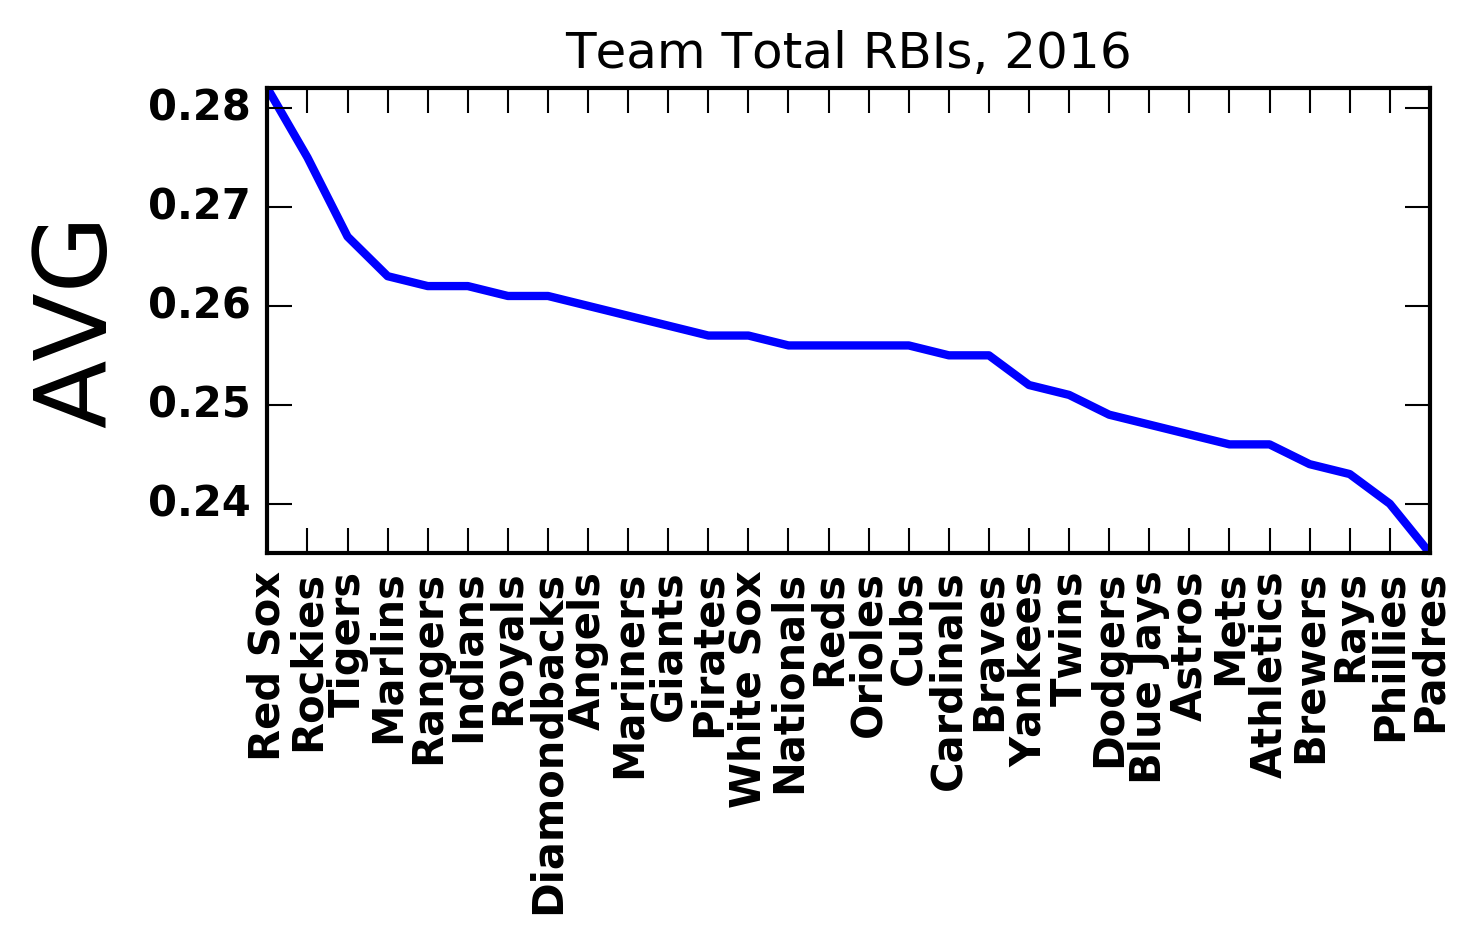

In [4]:
team_avg = Teams2016['AVG']
team_name = Teams2016['Team']

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,team_avg.size,team_avg.size),team_avg[(-1.*team_avg).argsort()])
plt.ylabel('AVG',size=24)
plt.title('Team Total RBIs, 2016')
_ = plt.axis([1.,30.,np.min(team_avg),np.max(team_avg)])

# You can specify a rotation for the tick labels in degrees or with keywords.
_ = plt.xticks(np.linspace(1,30,30), team_name[(-1.*team_avg).argsort()], rotation='vertical')

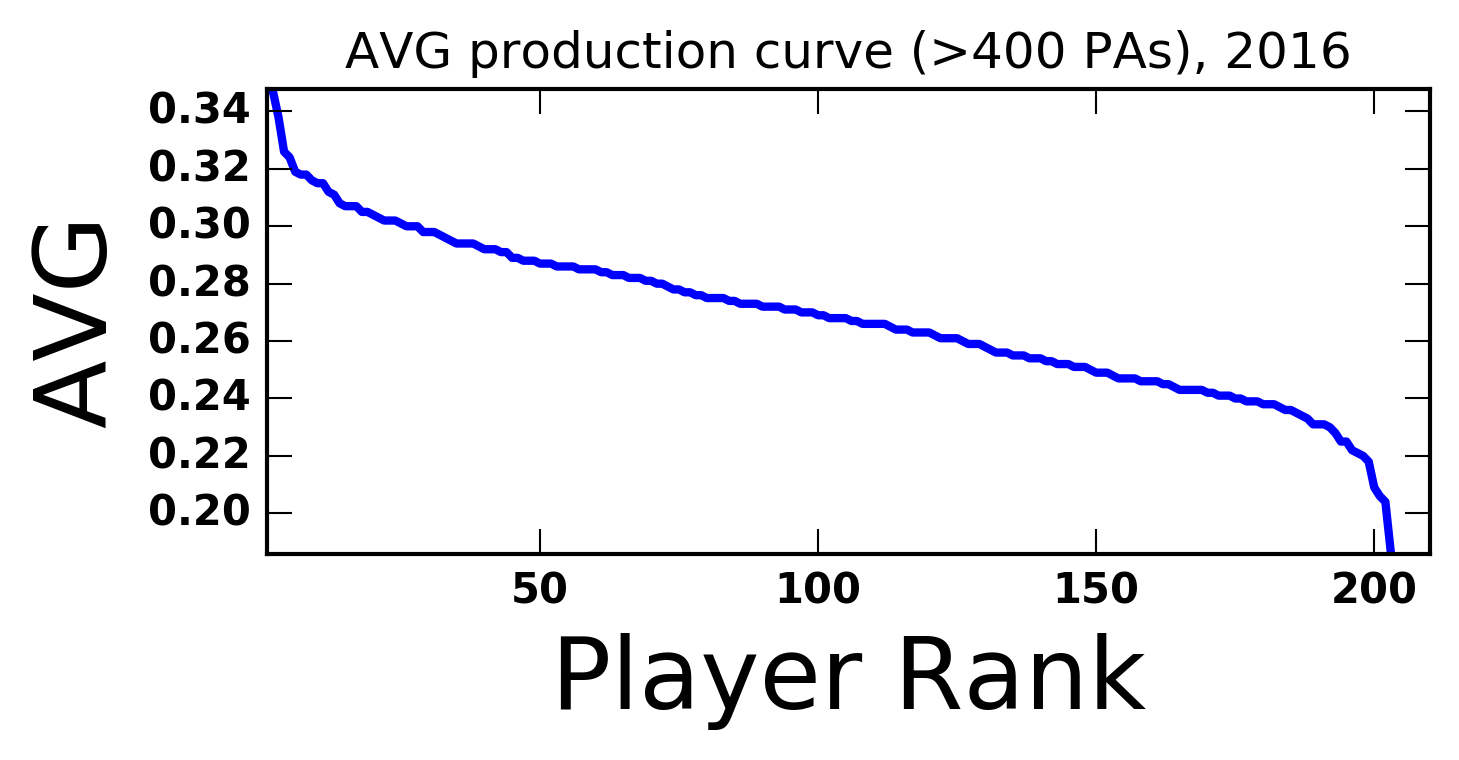

In [10]:
avg = Total2016['AVG']
pas = Total2016['PA']
names = Total2016['Name']

g_avg = np.where(pas>400)[0]

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,avg[g_avg].size,avg[g_avg].size),avg[g_avg[(-1.*avg[g_avg]).argsort()]])
plt.xlabel('Player Rank',size=24)
plt.ylabel('AVG',size=24)
plt.title('AVG production curve (>400 PAs), 2016')
_ = plt.axis([1.,210.,np.min(avg[g_avg]),np.max(avg[g_avg])])

Look at:
1. Volatility
2. PAs by batting order, affects weighting of players in average

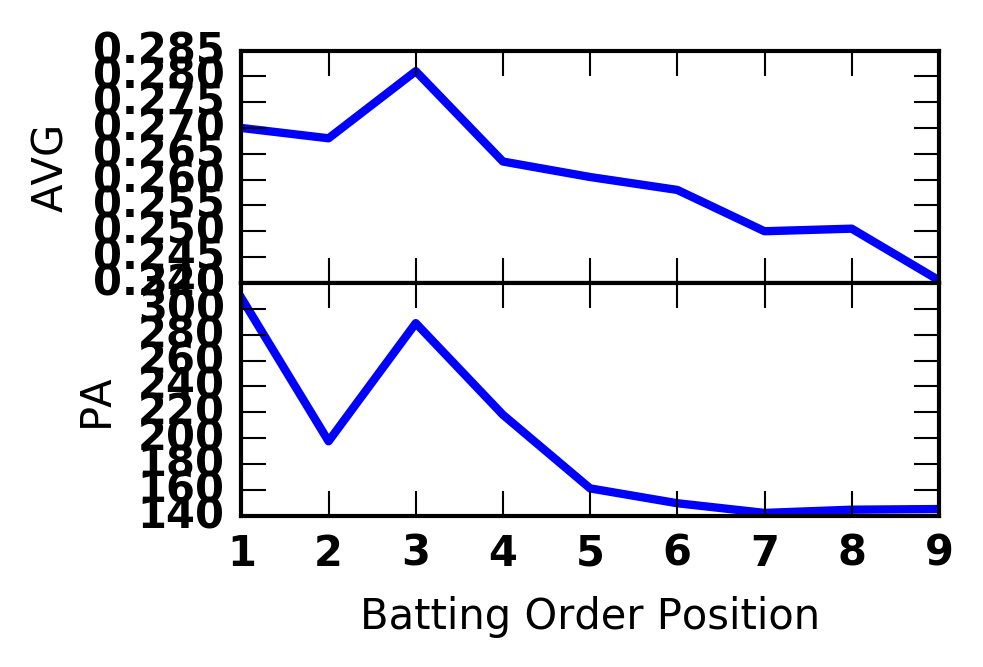

In [13]:
total_list = np.array([First2016,Second2016,Third2016,Fourth2016,Fifth2016,Sixth2016,Seventh2016,Eighth2016,Ninth2016])

total_order_avg = np.array([np.median(x['AVG']) for x in total_list])
total_order_pas = np.array([np.median(x['PA']) for x in total_list])



fig = plt.figure(figsize=(3,2))

plt.subplots_adjust(hspace=0.001)

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.plot(np.linspace(1.,9.,9),total_order_avg)
ax.set_ylabel('AVG')
ax.set_xticklabels(())

ax2.plot(np.linspace(1.,9.,9),total_order_pas)
ax2.set_ylabel('PA')
ax2.set_xlabel('Batting Order Position')

